In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline


# make sure tensorflow and Keras are installed. Use !pip if you are running the code on Google Colab
# pip install tensorflow
# pip install keras
# pip install keras-utils

In [21]:
# We are going to work on a classification problem
# The dataset is the famous penguins dataset available here: https://github.com/allisonhorst/palmerpenguins
# Also see: https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris
# The dataset has been modified to make all features numeric, except for the species column
data = pd.read_csv('penguins_cleaned_ds620.csv')

In [22]:
# Question #1: How many features are there is the dataset? Show the code that extracts this number
num_features = data.drop(columns = ["species"]).shape[1]
print(f"Number of features: {num_features}")

Number of features: 4


In [23]:
# Question #2: What are the features is the dataset? Show the code that lists the feature names
feature_names = data.drop(columns = ["species"]).columns
n = 1
for feature in feature_names.tolist():
  print(f"Feature {n}: {feature}")
  n += 1

Feature 1: bill_length_mm
Feature 2: bill_depth_mm
Feature 3: flipper_length_mm
Feature 4: body_mass_g


In [24]:
# Question #3: How many species are there is the dataset? Show the code that extracts this number
num_species = data["species"].nunique()
print(f"Number of species: {num_species}")


Number of species: 3


In [25]:
# We are going to train a classifier using Kera on the Penguin dataset
# before we do, let's split the dataset into data and classes, where the classes are in the species columns
# The data will be in X and the species will be in y

# Question #4: Assign the features to the X and the labels to y - show the code that creates X and y
X = data.drop(columns = ["species"])
y = data["species"]


In [26]:
# To reduce any potential bias, let's standardize the data in the X dataframe
# use the standard scaler to scale X

# Question #5: complete the code below so it results in a scaled X dataframe. Let's call the scaled version X for simplicity
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# Let's split the dataset into training and testing sets

# Question #6: complete the code below to split X and y into training and testing sets with 20% testing and a randomSeed=42
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [28]:
# Let's make sure y values are recorded as categorical
# from tensorflow.keras.to_categorical import to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

In [29]:
# We are now ready to train our classifiers using the Keras APIs
# Let's start with the Keras Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining our model as sequential
model = Sequential()

In [30]:
# Here is the code that sends the input X_train into a model with 32 nodes in the first hidden layer
model.add(Dense(
        units = 32, activation = "relu",
        input_shape = (X_train.shape[1],),
        name = "input"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Question #7: show code that adds another dense hidden layer with another 32 nodes
model.add(Dense(
        units = 32, activation = "relu",
        name = "hidden_2"))

In [32]:
# Question #8: show code that adds the output layer using softmax. Remember that there are three output nodes (3 species)
model.add(Dense(
    3, activation = "softmax", name = "output"))

In [33]:
# Question #9: use model summary to confirm the model you built - show the function call below
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Question #10: compile the code using a) categorical_crossentropy for the loss function, b) stochastic gradient descent with a 0.01 learning rate as the optimizer, and c) accuracy as the metric
from keras.optimizers import SGD

optimizer = SGD(learning_rate = 0.01)

model.compile(
    loss = "categorical_crossentropy",
    optimizer = optimizer,
    metrics = ["accuracy"]
)

In [37]:
# Question #11: train the model using using a) a batch size of 16, b) 50 epochs (iterations), and a validation split of 20%
#
perf = model.fit(
    X_train,
    y_train,
    batch_size = 16,
    epochs = 50,
    validation_split = 0.2
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4373 - loss: 1.1372 - val_accuracy: 0.5556 - val_loss: 0.9487
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5793 - loss: 0.9752 - val_accuracy: 0.8333 - val_loss: 0.7794
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8024 - loss: 0.8045 - val_accuracy: 0.8333 - val_loss: 0.6583
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7936 - loss: 0.7035 - val_accuracy: 0.8333 - val_loss: 0.5731
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7848 - loss: 0.6301 - val_accuracy: 0.8333 - val_loss: 0.5079
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8073 - loss: 0.5506 - val_accuracy: 0.8333 - val_loss: 0.4576
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8077 - loss: 0.4985 - val_accuracy: 0.8333 - val_loss: 0.4169
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8166 - loss: 0.4597 - val_accuracy: 0.8333 - val_loss

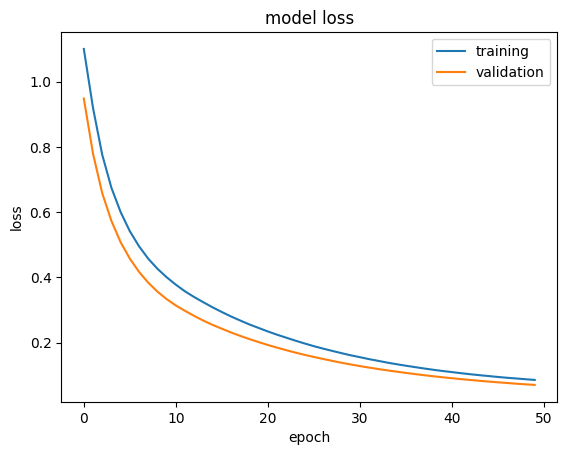

In [38]:
# use this code to plot the training metrics
plt.plot(perf.history["loss"])
plt.plot(perf.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training", "validation"], loc = "best")

plt.show()

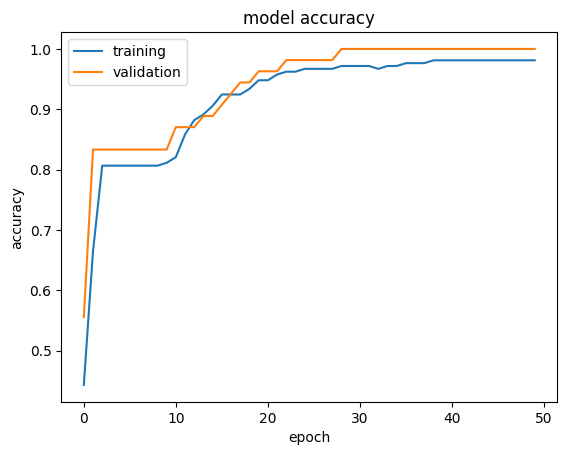

In [39]:
# Question #12 using the above code as example, plot the accuracy for the training and validation
# change the labels accordingly
plt.plot(perf.history["accuracy"])
plt.plot(perf.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training", "validation"], loc = "best")
plt.show()

In [40]:
# Using model.predict on X_test to get the predictions
class_predictions = np.argmax(model.predict(X_test), axis = -1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [44]:
# Question #13
# write some code that will calulate the accuracy of the model by comparing y_test to class_predictions
# the answer must be in percentages
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, class_predictions) * 100
print(f"{round(test_accuracy, 2)}%")

97.01%


Question #14 how does the test accuracy compare to the training accuracy?

- Test Accuracy = 97%

- Training Accuracy = 97-99%

- The test accuracy is similar to the training accuracy, albeit at the lower end of the spectrum.

- This indicates that the model generalizes well, there is no major overfitting, and the underlying patterns were learned without memorization.

In [50]:
# Question #15 run the following code to printout the results of your comparison
print(f"Test Accuracy: {round(test_accuracy, 2)}%")
print("\nPredictions:")
print(class_predictions)
print("\nTargets:")
print(np.asarray(y_test,dtype = "int32"))

Test Accuracy: 97.01%

Predictions:
[0 2 0 1 0 2 2 1 1 1 0 0 0 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 0 2 2 0 0 2 0]

Targets:
[0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 2 2 2 0 0 2 0]
